<a href="https://colab.research.google.com/github/alirezakavianifar/RL-DeltaIoT/blob/main/Innovativeideas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a reinforcement learning (RL) environment for optimizing energy consumption in a software system using Gymnasium involves several steps. Below is a basic implementation to get you started. This example assumes you have a function that can evaluate the energy consumption given a configuration.

First, install Gymnasium if you haven't already:

```bash
pip install gymnasium
```

Next, create the RL environment. The `SoftwareEnv` class below represents a Gymnasium environment for your software system:

```python
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SoftwareEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, config_space, energy_function):
        super(SoftwareEnv, self).__init__()
        
        # Configuration space (list of lists, where each list represents the range of values for a feature)
        self.config_space = config_space
        
        # Action and observation space
        self.action_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        self.observation_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        
        # Energy consumption evaluation function
        self.energy_function = energy_function
        
        # Current configuration
        self.state = self._get_random_config()
    
    def _get_random_config(self):
        return [np.random.choice(len(feature_space)) for feature_space in self.config_space]
    
    def reset(self):
        self.state = self._get_random_config()
        return self.state
    
    def step(self, action):
        self.state = action
        
        # Calculate energy consumption based on the current configuration
        energy_consumption = self.energy_function(self.state)
        
        # For optimization, we can use the negative energy consumption as the reward
        reward = -energy_consumption
        
        done = False
        
        return self.state, reward, done, {}
    
    def render(self, mode='human'):
        print(f'Current Configuration: {self.state}')
        
    def close(self):
        pass

# Example energy consumption function
def example_energy_function(config):
    # Dummy function: sum of the configuration vector
    return sum(config)

# Example configuration space: each feature has a range from 0 to 4
config_space = [list(range(5)), list(range(5)), list(range(5))]

# Create the environment
env = SoftwareEnv(config_space, example_energy_function)

# Example usage
state = env.reset()
print(f'Initial state: {state}')

action = [1, 2, 3]
state, reward, done, info = env.step(action)
print(f'State: {state}, Reward: {reward}')
```

### Explanation:

1. **Environment Initialization**:
    - `config_space`: Defines the possible values for each feature in the configuration vector.
    - `action_space` and `observation_space`: Define the spaces using `spaces.MultiDiscrete` based on the `config_space`.
    - `energy_function`: A function that computes the energy consumption given a configuration.

2. **State Initialization**:
    - `_get_random_config()`: Generates a random initial configuration.

3. **Step Function**:
    - Takes an action (new configuration) and calculates the new state.
    - Computes the energy consumption and returns the negative as the reward.
    - In this simple version, `done` is always `False` since there's no terminal state defined.

4. **Example Energy Function**:
    - A simple example where the energy consumption is the sum of the configuration values.

5. **Environment Interaction**:
    - Resetting the environment to get an initial state.
    - Taking an action and receiving the next state, reward, and other info.

### Using the Environment with RL Algorithms:

To train an RL agent using this environment, you can use libraries such as Stable Baselines3. Here is an example of how to use Stable Baselines3 with this custom environment:

```bash
pip install stable-baselines3
```

```python
from stable_baselines3 import PPO

# Create the environment
env = SoftwareEnv(config_space, example_energy_function)

# Initialize the agent
model = PPO("MlpPolicy", env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Save the agent
model.save("ppo_software_env")

# Load the agent
model = PPO.load("ppo_software_env")

# Test the trained agent
obs = env.reset()
for _ in range(100):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
```

This script sets up the PPO algorithm to train on the custom environment and then tests the trained agent. You can adjust the `total_timesteps` and other parameters to fit your specific needs.

The reward function in a reinforcement learning environment is crucial for guiding the agent towards the desired goal. In the context of optimizing energy consumption, the reward function should reflect the efficiency of the configuration in terms of energy usage. Here are a few ideas for designing the reward function:

1. **Negative Energy Consumption**:
    - The simplest approach is to use the negative value of the energy consumption as the reward. This way, lower energy consumption results in a higher reward.
    ```python
    reward = -energy_consumption
    ```

2. **Energy Consumption with Penalties**:
    - If there are additional constraints or goals (e.g., performance metrics that should not be compromised), you can incorporate penalties into the reward function.
    ```python
    performance_metric = evaluate_performance(config)  # Example performance evaluation
    penalty = 0
    if performance_metric < threshold:
        penalty = large_value  # Penalty for not meeting performance criteria
    reward = -energy_consumption - penalty
    ```

3. **Normalized Energy Consumption**:
    - Normalizing the energy consumption within a certain range can help in situations where the absolute values vary significantly.
    ```python
    max_energy = 100  # Example maximum energy consumption
    min_energy = 0    # Example minimum energy consumption
    reward = -((energy_consumption - min_energy) / (max_energy - min_energy))
    ```

4. **Relative Improvement**:
    - Reward based on the improvement over a baseline or previous state. This can encourage continuous improvement.
    ```python
    if previous_energy_consumption is not None:
        improvement = previous_energy_consumption - energy_consumption
        reward = improvement
    else:
        reward = -energy_consumption
    previous_energy_consumption = energy_consumption
    ```

Here’s how you might integrate a simple negative energy consumption reward into the `SoftwareEnv` class:

```python
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SoftwareEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, config_space, energy_function):
        super(SoftwareEnv, self).__init__()
        
        # Configuration space (list of lists, where each list represents the range of values for a feature)
        self.config_space = config_space
        
        # Action and observation space
        self.action_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        self.observation_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        
        # Energy consumption evaluation function
        self.energy_function = energy_function
        
        # Current configuration
        self.state = self._get_random_config()
    
    def _get_random_config(self):
        return [np.random.choice(len(feature_space)) for feature_space in self.config_space]
    
    def reset(self):
        self.state = self._get_random_config()
        return self.state
    
    def step(self, action):
        self.state = action
        
        # Calculate energy consumption based on the current configuration
        energy_consumption = self.energy_function(self.state)
        
        # Reward function: Negative of the energy consumption
        reward = -energy_consumption
        
        # Assuming no terminal state for simplicity
        done = False
        
        return self.state, reward, done, {}
    
    def render(self, mode='human'):
        print(f'Current Configuration: {self.state}, Energy Consumption: {self.energy_function(self.state)}')
        
    def close(self):
        pass

# Example energy consumption function
def example_energy_function(config):
    # Dummy function: sum of the configuration vector
    return sum(config)

# Example configuration space: each feature has a range from 0 to 4
config_space = [list(range(5)), list(range(5)), list(range(5))]

# Create the environment
env = SoftwareEnv(config_space, example_energy_function)

# Example usage
state = env.reset()
print(f'Initial state: {state}')

action = [1, 2, 3]
state, reward, done, info = env.step(action)
print(f'State: {state}, Reward: {reward}')
```

### Explanation of the Reward Function:
- The reward is set to the negative of the energy consumption (`reward = -energy_consumption`). This means that lower energy consumption will result in a higher (less negative) reward.
- The `step` function updates the environment state based on the action, calculates the energy consumption for the new configuration, computes the reward, and returns the new state, reward, and other info.

### Further Refinements:
- You can incorporate more sophisticated reward mechanisms depending on additional factors like performance metrics, penalties for constraint violations, or incentives for improvements. Adjusting the reward function according to the specific goals and constraints of your system will help the RL agent learn more effectively.

The related work section of the document you provided discusses various strategies and approaches for software configuration tuning, focusing on the challenges and methodologies in this domain. Below is a summary of the relevant points:

### Overview of Software Configuration Tuning
Software configuration tuning is essential for optimizing performance objectives, such as minimizing latency or maximizing throughput. The complexity and expense of measuring software configurations have historically led to limited success in this field, particularly in avoiding local optima traps.

### Traditional Optimization Approaches
Several traditional optimization approaches have been employed in software configuration tuning, including:
- **Random Search:** Simple yet often ineffective in complex landscapes due to lack of directionality.
- **Hill Climbing:** Focuses on local improvements, which can lead to local optima.
- **Genetic Algorithms:** Use evolutionary strategies to explore the search space but may still face challenges with local optima.
- **Simulated Annealing:** Balances exploration and exploitation but requires careful tuning of parameters.

These approaches typically focus on the internal components of the optimizer, such as search operators and strategies, to improve performance.

### Multi-Objectivization Approach
Multi-objectivization transforms a single-objective optimization problem into a multi-objective one to avoid local optima by making similarly performing configurations less comparable (i.e., Pareto nondominated). This method aims to facilitate better exploration of the search space and avoid local optima by introducing auxiliary objectives.

#### MMO Model
The MMO (Meta Multi-Objectivization) model introduces an auxiliary performance objective in addition to the primary one. Instead of optimizing this auxiliary objective, it serves to create a diverse set of configurations that are Pareto nondominated, thus preventing the search from being trapped in local optima. The key innovation here is a new normalization method that effectively uses the MMO model without requiring sensitive parameter tuning.

### Evaluation and Results
Experiments on various real-world software systems demonstrate that the MMO model with the new normalization method outperforms traditional single-objective optimizers and achieves significant speedup. The MMO model also shows improvements over model-based tuning methods like FLASH and BOCA.

### Contributions
The main contributions of the discussed work are:
- Introduction of the MMO model for better handling of local optima in software configuration tuning.
- Development of a new normalization method to eliminate the need for sensitive parameter tuning.
- Extensive evaluation demonstrating the effectiveness and efficiency of the MMO model across multiple systems and environments.

The related work section sets the stage for understanding the challenges and advancements in the field of software configuration tuning, highlighting the novel approach of multi-objectivization for improved performance optimization.

In the context of the document you provided, a normalization method refers to a technique used to adjust the scales of different objectives to make them comparable and manageable within the optimization process. Normalization is especially important in multi-objective optimization, where different objectives might have different units or ranges, making direct comparisons difficult.

### Purpose of Normalization

1. **Scale Adjustment**:
   - Different objectives in an optimization problem can have varying scales. For example, energy consumption might range from 0 to 1000 units, while latency might range from 0 to 10 milliseconds. Normalization adjusts these scales to a common range, typically [0, 1], to ensure that no single objective disproportionately influences the optimization process.

2. **Facilitation of Pareto Optimization**:
   - In multi-objective optimization, solutions are often evaluated based on Pareto dominance, where one solution is considered better if it is no worse in all objectives and strictly better in at least one. Normalization helps in comparing the performance across different objectives by bringing them to a common scale.

3. **Improving Convergence**:
   - Normalization can help in guiding the optimization algorithm more effectively, especially in complex search spaces, by providing a balanced view of improvements across multiple objectives.

### Normalization in the MMO Model

The MMO (Meta Multi-Objectivization) model introduced in the document uses normalization as a key component to handle the auxiliary objectives effectively. Here’s how it works in the context of the MMO model:

1. **Auxiliary Performance Objective**:
   - The MMO model introduces an auxiliary performance objective alongside the primary one. This auxiliary objective helps create a diverse set of configurations that are Pareto nondominated, aiding in better exploration of the search space.

2. **Normalization Method**:
   - The new normalization method developed in the MMO model helps adjust the scales of the primary and auxiliary objectives to make them comparable. This normalization method eliminates the need for sensitive parameter tuning, which is often a challenge in traditional optimization methods.
   
3. **Parameter-Free Optimization**:
   - By effectively normalizing the objectives, the MMO model can operate without requiring the user to carefully tune parameters for balancing different objectives. This makes the optimization process more robust and easier to apply across different scenarios.

### Example of Normalization

A typical normalization formula for an objective \( O \) could be:

$[ O_{\text{normalized}} = \frac{O - O_{\text{min}}}{O_{\text{max}} - O_{\text{min}}} ]$

where $( O_{\text{min}} )$ and $( O_{\text{max}} )$ are the minimum and maximum observed values of the objective $( O )$. This scales $( O )$ to a range of [0, 1].

### Impact of Normalization

Normalization impacts the optimization process by ensuring that each objective is weighted equally in terms of its influence on the decision-making process. This is crucial in multi-objective optimization to avoid scenarios where one objective dominates the others purely due to its scale.

In summary, the normalization method in the MMO model adjusts the scales of different objectives to a common range, making them comparable and facilitating effective Pareto optimization. This leads to improved exploration of the search space and better overall performance of the optimization algorithm without requiring extensive parameter tuning.

The normalization method introduced in the paper is designed to address issues found in the FSE work. The new normalization method adjusts the objective values based on the local bounds of the current population of configurations instead of global bounds. This method ensures that the values of both the target and auxiliary objectives are commensurable, which reduces the need for fine-tuning a weight parameter and helps maintain a balance between selection pressure and diversity.

Here is a summary of the key aspects of the new normalization method:

1. **Local Bounds Normalization**: The normalization is based on the minimum and maximum values of the current population for each generation. This approach adapts dynamically to the evolving population during the optimization process.
   
   The normalization formula used is:
   \[
   f(x) = \frac{f_o(x) - f_o^{\min}}{f_o^{\max} - f_o^{\min}}
   \]
   where \( f_o(x) \) is the original objective value of configuration \( x \), and \( f_o^{\min} \) and \( f_o^{\max} \) are the minimum and maximum values of the current population for the objective \( f \)【15:3†source】.

2. **Elimination of Weight Parameter**: By using this normalization method, the need for a weight parameter \( w \) to balance the target and auxiliary objectives is removed. This makes the optimization process simpler and more robust as it eliminates the risk of poor outcomes due to inappropriate weight settings【15:4†source】.

3. **Improved Effectiveness**: The new normalization method has been shown to lead to better results compared to the previous normalization method used in the FSE work. It achieves a good balance between imposing selection pressure towards the best target performance and preserving diversity in auxiliary performance【15:3†source】【15:4†source】.

4. **Pseudo-code Integration**: The pseudo-code for the modified MMO model with the new normalization method integrates these adjustments by updating the bounds at each generation and normalizing the objective values accordingly. This is reflected in lines 6-7 and 23-24 of the pseudo-code in the document【15:0†source】【15:2†source】.

By adapting the normalization dynamically based on the local bounds, the new method ensures that the configurations do not concentrate into a single value on either objective, thus maintaining a diverse and effective search space throughout the optimization process【15:1†source】.

Hindsight Experience Replay (HER) is an effective technique originally proposed for goal-oriented reinforcement learning tasks. It involves storing trajectories where the goals are replaced with states that were actually achieved, allowing the agent to learn from both successful and unsuccessful experiences by treating failures as intentional successes towards different goals. Adapting HER for software configuration tuning could involve redefining goals and leveraging past experiences to enhance optimization.

Here's a step-by-step outline to propose a method that uses HER for the same purpose as stated in the article (i.e., optimizing software configurations):

### Step 1: Define Goals and States
- **Goals**: In the context of software configuration tuning, goals can be considered as target configurations that lead to optimal performance in terms of energy consumption or other metrics.
- **States**: Each state represents a specific configuration of the software system.

### Step 2: Adapt the Reward Function
- The reward function should reflect the performance (e.g., energy consumption) of the configurations. Negative energy consumption can be used as the reward, as previously discussed.

### Step 3: Implement Hindsight Experience Replay
HER can be integrated into the RL algorithm to augment the learning process with experiences that might have been failures but can be treated as successful outcomes for different goals.

#### Pseudo-code Implementation

Here’s a simplified pseudo-code that integrates HER into the training loop of an RL algorithm for software configuration tuning:

```python
import numpy as np
from collections import deque
import random

class HERSoftwareEnv(SoftwareEnv):
    def __init__(self, config_space, energy_function, her_k=4):
        super(HERSoftwareEnv, self).__init__(config_space, energy_function)
        self.her_k = her_k
        self.memory = deque(maxlen=10000)  # Replay buffer
    
    def step(self, action):
        self.state = action
        energy_consumption = self.energy_function(self.state)
        reward = -energy_consumption
        done = False
        return self.state, reward, done, {}
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def hindsight_replay(self):
        her_batch = []
        for state, action, reward, next_state, done in self.memory:
            her_goals = self._sample_her_goals(state)
            for goal in her_goals:
                her_reward = self._compute_reward(state, goal)
                her_batch.append((state, action, her_reward, goal, done))
        self.memory.extend(her_batch)
    
    def _sample_her_goals(self, state):
        # Sample k random states from the future trajectory as goals
        future_states = [random.choice(self.memory)[3] for _ in range(self.her_k)]
        return future_states
    
    def _compute_reward(self, state, goal):
        # Use the energy consumption of the goal state as the reward
        energy_consumption = self.energy_function(goal)
        return -energy_consumption

# Example usage
config_space = [list(range(5)), list(range(5)), list(range(5))]
def example_energy_function(config):
    return sum(config)

env = HERSoftwareEnv(config_space, example_energy_function)

# Train the agent with HER
for episode in range(1000):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Replace with a policy action
        next_state, reward, done, info = env.step(action)
        env.store_transition(state, action, reward, next_state, done)
        state = next_state
    
    env.hindsight_replay()  # Augment the replay buffer with HER

# Example of sampling from memory for training
batch_size = 64
samples = env.sample_memory(batch_size)
```

### Step 4: Integrate with a RL Algorithm
- The HER-augmented experiences can be used to train the RL agent. Libraries like Stable Baselines3 can be modified to incorporate HER by customizing the replay buffer and training loop.

### Step 5: Evaluate and Iterate
- Evaluate the performance of the agent with and without HER to assess the effectiveness of the hindsight experiences.
- Iterate on the approach by tuning parameters like the number of hindsight goals (her_k) and the structure of the reward function.

### Explanation of Key Components
- **Replay Buffer**: Stores experiences (state, action, reward, next_state, done) and is augmented with hindsight experiences.
- **Hindsight Goals**: For each experience, sample a few future states and treat them as goals.
- **Hindsight Rewards**: Recompute rewards based on the new goals, typically using the energy consumption of these goals.

By leveraging HER, the agent can learn more efficiently from a richer set of experiences, potentially leading to better performance in optimizing software configurations.

Sure, let's walk through a concrete example of how Hindsight Experience Replay (HER) could be used to minimize energy consumption in software configuration tuning.

### Example Scenario
Imagine we have a software system with multiple configuration parameters, each affecting the system's energy consumption. Our goal is to find configurations that minimize energy consumption.

### Key Components
- **State**: A specific configuration of the software system.
- **Action**: Adjusting the configuration parameters.
- **Reward**: Negative energy consumption (lower energy consumption results in a higher reward).

### Steps to Implement HER

#### 1. Define the Environment and Reward Function
First, define the environment and the energy consumption function:

```python
import numpy as np
from collections import deque
import random
import gymnasium as gym
from gymnasium import spaces

class HERSoftwareEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, config_space, energy_function, her_k=4):
        super(HERSoftwareEnv, self).__init__()
        
        # Configuration space
        self.config_space = config_space
        self.action_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        self.observation_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        
        # Energy consumption function
        self.energy_function = energy_function
        
        # HER parameters
        self.her_k = her_k
        self.memory = deque(maxlen=10000)  # Replay buffer
        
        self.reset()
    
    def reset(self):
        self.state = self._get_random_config()
        return self.state
    
    def _get_random_config(self):
        return [np.random.choice(len(feature_space)) for feature_space in self.config_space]
    
    def step(self, action):
        self.state = action
        energy_consumption = self.energy_function(self.state)
        reward = -energy_consumption
        done = False
        return self.state, reward, done, {}
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def hindsight_replay(self):
        her_batch = []
        for state, action, reward, next_state, done in self.memory:
            her_goals = self._sample_her_goals(state)
            for goal in her_goals:
                her_reward = self._compute_reward(goal)
                her_batch.append((state, action, her_reward, goal, done))
        self.memory.extend(her_batch)
    
    def _sample_her_goals(self, state):
        # Sample k random states from the future trajectory as goals
        future_states = [random.choice(self.memory)[3] for _ in range(self.her_k)]
        return future_states
    
    def _compute_reward(self, goal):
        # Use the energy consumption of the goal state as the reward
        energy_consumption = self.energy_function(goal)
        return -energy_consumption
    
    def render(self, mode='human'):
        print(f'Current Configuration: {self.state}, Energy Consumption: {self.energy_function(self.state)}')

# Example energy consumption function
def example_energy_function(config):
    return sum(config)  # Dummy function: sum of the configuration vector

# Example configuration space: each feature has a range from 0 to 4
config_space = [list(range(5)), list(range(5)), list(range(5))]

# Create the environment
env = HERSoftwareEnv(config_space, example_energy_function)
```

#### 2. Integrate HER into Training
Train an RL agent with HER:

```python
# Example usage with HER
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Replace with a policy action
        next_state, reward, done, info = env.step(action)
        env.store_transition(state, action, reward, next_state, done)
        state = next_state
    
    env.hindsight_replay()  # Augment the replay buffer with HER

# Example of sampling from memory for training
batch_size = 64
samples = env.sample_memory(batch_size)
```

### Detailed Example of HER in Action

#### Initial Configuration and Trajectory

1. **Episode Start**: Start with an initial random configuration, e.g., `[0, 2, 3]`.
2. **Actions and Transitions**:
    - Action: Change to `[1, 2, 3]`, reward = -6 (energy consumption = 6).
    - Action: Change to `[1, 3, 3]`, reward = -7 (energy consumption = 7).
    - Action: Change to `[2, 3, 4]`, reward = -9 (energy consumption = 9).

#### Hindsight Experience Replay (HER)

During HER, we sample future states as goals:

- Original experience: `(state, action, reward, next_state, done)`.
- Suppose `[2, 3, 4]` is chosen as a goal from future states.

For each transition, we recompute the reward as if the goal was to reach `[2, 3, 4]`:

1. Transition: `[0, 2, 3] -> [1, 2, 3]` with hindsight goal `[2, 3, 4]`.
    - Hindsight reward: Compute based on `[2, 3, 4]`, e.g., energy consumption = 9, reward = -9.

2. Transition: `[1, 2, 3] -> [1, 3, 3]` with hindsight goal `[2, 3, 4]`.
    - Hindsight reward: Compute based on `[2, 3, 4]`, e.g., energy consumption = 9, reward = -9.

3. Transition: `[1, 3, 3] -> [2, 3, 4]` with hindsight goal `[2, 3, 4]`.
    - Hindsight reward: Compute based on `[2, 3, 4]`, e.g., energy consumption = 9, reward = -9.

By using HER, the agent learns from both the original and hindsight experiences, effectively augmenting the training data and improving its ability to find configurations that minimize energy consumption. This approach allows the agent to generalize better and learn more efficiently by treating unsuccessful trajectories as successful ones for different goals.

Using Hindsight Experience Replay (HER) to minimize energy consumption while using packet loss as a hindsight goal is a creative approach to explore the search space more effectively. Here’s how you can implement this:

### Concept
- **Primary Goal**: Minimize energy consumption.
- **Hindsight Goal**: Minimize packet loss.

By treating packet loss as an auxiliary goal, we can encourage the agent to explore configurations that might not immediately seem optimal for energy consumption but could lead to better overall configurations when considering both objectives.

### Steps to Implement HER with Packet Loss

#### 1. Modify the Environment to Include Packet Loss
Extend the environment to compute both energy consumption and packet loss.

```python
class HERSoftwareEnvWithPacketLoss(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, config_space, energy_function, packet_loss_function, her_k=4):
        super(HERSoftwareEnvWithPacketLoss, self).__init__()
        
        # Configuration space
        self.config_space = config_space
        self.action_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        self.observation_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        
        # Performance functions
        self.energy_function = energy_function
        self.packet_loss_function = packet_loss_function
        
        # HER parameters
        self.her_k = her_k
        self.memory = deque(maxlen=10000)  # Replay buffer
        
        self.reset()
    
    def reset(self):
        self.state = self._get_random_config()
        return self.state
    
    def _get_random_config(self):
        return [np.random.choice(len(feature_space)) for feature_space in self.config_space]
    
    def step(self, action):
        self.state = action
        energy_consumption = self.energy_function(self.state)
        packet_loss = self.packet_loss_function(self.state)
        reward = -energy_consumption  # Primary goal: minimize energy consumption
        done = False
        return self.state, reward, done, {'packet_loss': packet_loss}
    
    def store_transition(self, state, action, reward, next_state, done, info):
        self.memory.append((state, action, reward, next_state, done, info))
    
    def sample_memory(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def hindsight_replay(self):
        her_batch = []
        for state, action, reward, next_state, done, info in self.memory:
            her_goals = self._sample_her_goals()
            for goal in her_goals:
                her_reward = self._compute_hindsight_reward(goal)
                her_info = {'packet_loss': self.packet_loss_function(goal)}
                her_batch.append((state, action, her_reward, goal, done, her_info))
        self.memory.extend(her_batch)
    
    def _sample_her_goals(self):
        # Sample k random future states as goals
        future_states = [random.choice(self.memory)[3] for _ in range(self.her_k)]
        return future_states
    
    def _compute_hindsight_reward(self, goal):
        # Use the packet loss of the goal state as the hindsight reward
        packet_loss = self.packet_loss_function(goal)
        return -packet_loss  # Hindsight goal: minimize packet loss
    
    def render(self, mode='human'):
        print(f'Current Configuration: {self.state}, Energy Consumption: {self.energy_function(self.state)}, Packet Loss: {self.packet_loss_function(self.state)}')

# Example energy and packet loss functions
def example_energy_function(config):
    return sum(config)  # Dummy function: sum of the configuration vector

def example_packet_loss_function(config):
    return max(config)  # Dummy function: max of the configuration vector

# Example configuration space: each feature has a range from 0 to 4
config_space = [list(range(5)), list(range(5)), list(range(5))]

# Create the environment
env = HERSoftwareEnvWithPacketLoss(config_space, example_energy_function, example_packet_loss_function)
```

#### 2. Train the Agent with HER Using Packet Loss as Hindsight Goal
In the training loop, store transitions and perform hindsight replay.

```python
# Example usage with HER
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Replace with a policy action
        next_state, reward, done, info = env.step(action)
        env.store_transition(state, action, reward, next_state, done, info)
        state = next_state
    
    env.hindsight_replay()  # Augment the replay buffer with HER

# Example of sampling from memory for training
batch_size = 64
samples = env.sample_memory(batch_size)
```

### Detailed Example of HER with Packet Loss

1. **Initial Configuration and Trajectory**:
    - Start with an initial random configuration, e.g., `[0, 2, 3]`.
    - Action: Change to `[1, 2, 3]`, reward = -6 (energy consumption), packet loss = 3.
    - Action: Change to `[1, 3, 3]`, reward = -7 (energy consumption), packet loss = 3.
    - Action: Change to `[2, 3, 4]`, reward = -9 (energy consumption), packet loss = 4.

2. **Hindsight Experience Replay**:
    - Original experience: `(state, action, reward, next_state, done, info)`.
    - Suppose `[2, 3, 4]` is chosen as a hindsight goal from future states.

3. **Recompute Hindsight Reward**:
    - Transition: `[0, 2, 3] -> [1, 2, 3]` with hindsight goal `[2, 3, 4]`.
        - Hindsight reward: Compute based on packet loss of `[2, 3, 4]`, e.g., packet loss = 4, reward = -4.

    - Transition: `[1, 2, 3] -> [1, 3, 3]` with hindsight goal `[2, 3, 4]`.
        - Hindsight reward: Compute based on packet loss of `[2, 3, 4]`, e.g., packet loss = 4, reward = -4.

    - Transition: `[1, 3, 3] -> [2, 3, 4]` with hindsight goal `[2, 3, 4]`.
        - Hindsight reward: Compute based on packet loss of `[2, 3, 4]`, e.g., packet loss = 4, reward = -4.

By using HER with packet loss as the hindsight goal, the agent learns from both the original and hindsight experiences. This helps in exploring configurations that might initially seem suboptimal for energy consumption but could lead to better overall configurations by considering packet loss. This approach encourages exploration and helps the agent find configurations that balance both energy consumption and packet loss.

Yes, implementing a normalization method can indeed help the agent learn better when dealing with objectives that have different scales, such as energy consumption and packet loss. Normalizing the objectives to a common scale ensures that neither objective disproportionately influences the learning process.

### Implementing Normalization

You can normalize the objectives based on their respective minimum and maximum values observed during the training process. Here's an approach to normalize both energy consumption and packet loss:

1. **Track Min and Max Values**: Keep track of the minimum and maximum values for both energy consumption and packet loss.
2. **Normalize Values**: Normalize the values of energy consumption and packet loss to a common scale (e.g., 0 to 1).

### Updated Environment with Normalization

Below is an updated version of the environment that includes normalization of energy consumption and packet loss:

```python
import numpy as np
from collections import deque
import random
import gymnasium as gym
from gymnasium import spaces

class HERSoftwareEnvWithNormalizedGoals(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, config_space, energy_function, packet_loss_function, her_k=4):
        super(HERSoftwareEnvWithNormalizedGoals, self).__init__()
        
        # Configuration space
        self.config_space = config_space
        self.action_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        self.observation_space = spaces.MultiDiscrete([len(feature_space) for feature_space in config_space])
        
        # Performance functions
        self.energy_function = energy_function
        self.packet_loss_function = packet_loss_function
        
        # HER parameters
        self.her_k = her_k
        self.memory = deque(maxlen=10000)  # Replay buffer
        
        # Normalization parameters
        self.energy_min = float('inf')
        self.energy_max = float('-inf')
        self.packet_loss_min = float('inf')
        self.packet_loss_max = float('-inf')
        
        self.reset()
    
    def reset(self):
        self.state = self._get_random_config()
        return self.state
    
    def _get_random_config(self):
        return [np.random.choice(len(feature_space)) for feature_space in self.config_space]
    
    def step(self, action):
        self.state = action
        energy_consumption = self.energy_function(self.state)
        packet_loss = self.packet_loss_function(self.state)
        
        # Update min and max values for normalization
        self.energy_min = min(self.energy_min, energy_consumption)
        self.energy_max = max(self.energy_max, energy_consumption)
        self.packet_loss_min = min(self.packet_loss_min, packet_loss)
        self.packet_loss_max = max(self.packet_loss_max, packet_loss)
        
        reward = -self._normalize(energy_consumption, self.energy_min, self.energy_max)  # Primary goal: minimize normalized energy consumption
        done = False
        return self.state, reward, done, {'packet_loss': packet_loss}
    
    def store_transition(self, state, action, reward, next_state, done, info):
        self.memory.append((state, action, reward, next_state, done, info))
    
    def sample_memory(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def hindsight_replay(self):
        her_batch = []
        for state, action, reward, next_state, done, info in self.memory:
            her_goals = self._sample_her_goals()
            for goal in her_goals:
                her_reward = self._compute_hindsight_reward(goal)
                her_info = {'packet_loss': self.packet_loss_function(goal)}
                her_batch.append((state, action, her_reward, goal, done, her_info))
        self.memory.extend(her_batch)
    
    def _sample_her_goals(self):
        # Sample k random future states as goals
        future_states = [random.choice(self.memory)[3] for _ in range(self.her_k)]
        return future_states
    
    def _compute_hindsight_reward(self, goal):
        # Use the packet loss of the goal state as the hindsight reward
        packet_loss = self.packet_loss_function(goal)
        return -self._normalize(packet_loss, self.packet_loss_min, self.packet_loss_max)  # Hindsight goal: minimize normalized packet loss
    
    def _normalize(self, value, min_val, max_val):
        # Normalize value to the range [0, 1]
        if max_val > min_val:
            return (value - min_val) / (max_val - min_val)
        else:
            return 0  # Avoid division by zero if all values are the same
    
    def render(self, mode='human'):
        energy = self.energy_function(self.state)
        packet_loss = self.packet_loss_function(self.state)
        norm_energy = self._normalize(energy, self.energy_min, self.energy_max)
        norm_packet_loss = self._normalize(packet_loss, self.packet_loss_min, self.packet_loss_max)
        print(f'Current Configuration: {self.state}, Energy Consumption: {energy} (normalized: {norm_energy}), Packet Loss: {packet_loss} (normalized: {norm_packet_loss})')

# Example energy and packet loss functions
def example_energy_function(config):
    return sum(config)  # Dummy function: sum of the configuration vector

def example_packet_loss_function(config):
    return max(config)  # Dummy function: max of the configuration vector

# Example configuration space: each feature has a range from 0 to 4
config_space = [list(range(5)), list(range(5)), list(range(5))]

# Create the environment
env = HERSoftwareEnvWithNormalizedGoals(config_space, example_energy_function, example_packet_loss_function)
```

### Training the Agent with Normalized Objectives

```python
# Example usage with HER
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Replace with a policy action
        next_state, reward, done, info = env.step(action)
        env.store_transition(state, action, reward, next_state, done, info)
        state = next_state
    
    env.hindsight_replay()  # Augment the replay buffer with HER

# Example of sampling from memory for training
batch_size = 64
samples = env.sample_memory(batch_size)
```

### Explanation of Key Changes

1. **Normalization Function**:
    - The `_normalize` function scales values to the [0, 1] range using observed minimum and maximum values.
    
2. **Tracking Min and Max Values**:
    - During each step, the environment updates the minimum and maximum observed values for energy consumption and packet loss.

3. **Normalized Rewards**:
    - Rewards are computed based on normalized values, ensuring that energy consumption and packet loss are on a similar scale.
    
4. **Hindsight Replay with Normalized Goals**:
    - In the hindsight replay, the reward is recomputed based on normalized packet loss, encouraging the agent to consider both objectives effectively.

By normalizing the objectives, you ensure that the learning process is not biased towards one objective over the other, allowing the agent to explore the search space more effectively and find configurations that optimize both energy consumption and packet loss.

If you consider the state as consisting of energy consumption and packet loss, and actions as selecting from a set of configurations, the environment and agent interaction will change. The state representation will focus on performance metrics (energy consumption and packet loss) rather than the configurations themselves, and the agent's actions will involve selecting from predefined configurations.

### Key Components
- **State**: A vector consisting of energy consumption and packet loss.
- **Action**: Index of a configuration vector from a predefined set of configurations.
- **Reward**: A function of energy consumption and packet loss.

### Steps to Implement

#### 1. Define the Environment

Define an environment where the state is a tuple of energy consumption and packet loss, and actions are indices to the configuration space.

```python
import numpy as np
from collections import deque
import random
import gymnasium as gym
from gymnasium import spaces

class HERSoftwareEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, config_space, energy_function, packet_loss_function, her_k=4):
        super(HERSoftwareEnv, self).__init__()
        
        # Configuration space
        self.config_space = config_space
        self.num_configs = len(config_space)
        self.action_space = spaces.Discrete(self.num_configs)
        
        # State space (energy consumption, packet loss)
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)
        
        # Performance functions
        self.energy_function = energy_function
        self.packet_loss_function = packet_loss_function
        
        # HER parameters
        self.her_k = her_k
        self.memory = deque(maxlen=10000)  # Replay buffer
        
        # Normalization parameters
        self.energy_min = float('inf')
        self.energy_max = float('-inf')
        self.packet_loss_min = float('inf')
        self.packet_loss_max = float('-inf')
        
        self.reset()
    
    def reset(self):
        self.current_config = self._get_random_config()
        energy_consumption = self.energy_function(self.current_config)
        packet_loss = self.packet_loss_function(self.current_config)
        self.state = np.array([energy_consumption, packet_loss])
        return self.state
    
    def _get_random_config(self):
        return random.choice(self.config_space)
    
    def step(self, action):
        self.current_config = self.config_space[action]
        energy_consumption = self.energy_function(self.current_config)
        packet_loss = self.packet_loss_function(self.current_config)
        
        # Update min and max values for normalization
        self.energy_min = min(self.energy_min, energy_consumption)
        self.energy_max = max(self.energy_max, energy_consumption)
        self.packet_loss_min = min(self.packet_loss_min, packet_loss)
        self.packet_loss_max = max(self.packet_loss_max, packet_loss)
        
        reward = -self._normalize(energy_consumption, self.energy_min, self.energy_max)  # Primary goal: minimize normalized energy consumption
        self.state = np.array([energy_consumption, packet_loss])
        done = False
        return self.state, reward, done, {}
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def hindsight_replay(self):
        her_batch = []
        for state, action, reward, next_state, done in self.memory:
            her_goals = self._sample_her_goals()
            for goal in her_goals:
                her_reward = self._compute_hindsight_reward(goal)
                her_batch.append((state, action, her_reward, goal, done))
        self.memory.extend(her_batch)
    
    def _sample_her_goals(self):
        # Sample k random future states as goals
        future_states = [random.choice(self.memory)[3] for _ in range(self.her_k)]
        return future_states
    
    def _compute_hindsight_reward(self, goal):
        # Use the packet loss of the goal state as the hindsight reward
        packet_loss = goal[1]
        return -self._normalize(packet_loss, self.packet_loss_min, self.packet_loss_max)  # Hindsight goal: minimize normalized packet loss
    
    def _normalize(self, value, min_val, max_val):
        # Normalize value to the range [0, 1]
        if max_val > min_val:
            return (value - min_val) / (max_val - min_val)
        else:
            return 0  # Avoid division by zero if all values are the same
    
    def render(self, mode='human'):
        energy = self.state[0]
        packet_loss = self.state[1]
        norm_energy = self._normalize(energy, self.energy_min, self.energy_max)
        norm_packet_loss = self._normalize(packet_loss, self.packet_loss_min, self.packet_loss_max)
        print(f'Current State: [Energy Consumption: {energy} (normalized: {norm_energy}), Packet Loss: {packet_loss} (normalized: {norm_packet_loss})]')

# Example energy and packet loss functions
def example_energy_function(config):
    return sum(config)  # Dummy function: sum of the configuration vector

def example_packet_loss_function(config):
    return max(config)  # Dummy function: max of the configuration vector

# Example configuration space: list of configuration vectors
config_space = [
    [0, 1, 2],
    [1, 1, 1],
    [2, 0, 0],
    [0, 0, 3],
    [1, 2, 2],
    [2, 1, 1]
]

# Create the environment
env = HERSoftwareEnv(config_space, example_energy_function, example_packet_loss_function)
```

### Training the Agent with Normalized Objectives

```python
# Example usage with HER
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Replace with a policy action
        next_state, reward, done, info = env.step(action)
        env.store_transition(state, action, reward, next_state, done)
        state = next_state
    
    env.hindsight_replay()  # Augment the replay buffer with HER

# Example of sampling from memory for training
batch_size = 64
samples = env.sample_memory(batch_size)
```

### Explanation of Key Changes

1. **State Representation**:
    - The state is represented as a tuple of energy consumption and packet loss.

2. **Action Space**:
    - The actions are discrete and represent indices of configurations in the configuration space.

3. **Reward Function**:
    - The reward is based on normalized energy consumption, but the hindsight reward is based on normalized packet loss.

4. **Normalization**:
    - Both energy consumption and packet loss are normalized based on their observed minimum and maximum values.

5. **Hindsight Replay**:
    - During hindsight replay, the agent recomputes the reward based on packet loss, encouraging exploration of configurations that might be optimal for packet loss as well.

By structuring the problem this way, the agent learns to balance energy consumption and packet loss, using HER to explore the search space more effectively. Normalizing the objectives ensures that both performance metrics are considered equally during the learning process.

Choosing the best state representation depends on various factors, including the complexity of the problem, the availability of information, and the specific goals you want to achieve. Here’s a comparative analysis of both state representations:

### State Representation 1: Configuration Vector as State
- **State**: The configuration vector itself.
- **Action**: Each element of the configuration vector (multi-dimensional action space).
- **Reward**: Based on performance metrics (e.g., energy consumption and packet loss).

#### Advantages:
1. **Direct Representation**: The agent directly interacts with the actual configuration, making it easier to understand the impact of each configuration on performance.
2. **Exploratory Power**: The agent can explore the configuration space more freely, potentially discovering novel configurations.

#### Disadvantages:
1. **High Dimensionality**: The action space can become large, especially if the configuration vector has many elements, making learning more complex.
2. **Sparse Rewards**: The agent may receive sparse and delayed rewards, especially in high-dimensional spaces, which can make training slower and less stable.

### State Representation 2: Performance Metrics as State
- **State**: Energy consumption and packet loss (performance metrics).
- **Action**: Selecting a configuration from a predefined set (discrete action space).
- **Reward**: Based on normalized performance metrics.

#### Advantages:
1. **Simplified Action Space**: The action space is simpler (discrete), which can make the learning process more efficient.
2. **Focused Learning**: The agent focuses directly on performance outcomes, potentially leading to faster convergence.

#### Disadvantages:
1. **Indirect Representation**: The agent doesn't interact directly with the configuration parameters, which might limit its ability to understand the underlying system dynamics.
2. **Dependence on Predefined Configurations**: The quality of learning depends heavily on the diversity and comprehensiveness of the predefined configuration set.

### Which is Better?

- **For Complex Configuration Spaces**: If the configuration space is large and complex, and you want the agent to learn intricate relationships between different configuration parameters, the first representation (configuration vector as state) might be better.
- **For Focused Optimization**: If the primary goal is to optimize specific performance metrics efficiently and the configuration space can be represented well by a finite set of configurations, the second representation (performance metrics as state) might be more effective.

### Recommended Approach

Given that your primary goal is to minimize energy consumption with packet loss as a hindsight goal, the second representation (performance metrics as state) might offer a more straightforward and efficient way to achieve this. It simplifies the action space and directly ties state changes to performance outcomes.

### Implementing the Performance Metrics as State

Below is the adjusted code snippet for the second approach with performance metrics as the state:

```python
import numpy as np
from collections import deque
import random
import gymnasium as gym
from gymnasium import spaces

class HERSoftwareEnvWithNormalizedGoals(gym.Env):
    metadata = {'render.modes': ['human']}
    
    def __init__(self, config_space, energy_function, packet_loss_function, her_k=4):
        super(HERSoftwareEnvWithNormalizedGoals, self).__init__()
        
        # Configuration space
        self.config_space = config_space
        self.num_configs = len(config_space)
        self.action_space = spaces.Discrete(self.num_configs)
        
        # State space (energy consumption, packet loss)
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)
        
        # Performance functions
        self.energy_function = energy_function
        self.packet_loss_function = packet_loss_function
        
        # HER parameters
        self.her_k = her_k
        self.memory = deque(maxlen=10000)  # Replay buffer
        
        # Normalization parameters
        self.energy_min = float('inf')
        self.energy_max = float('-inf')
        self.packet_loss_min = float('inf')
        self.packet_loss_max = float('-inf')
        
        self.reset()
    
    def reset(self):
        self.current_config = self._get_random_config()
        energy_consumption = self.energy_function(self.current_config)
        packet_loss = self.packet_loss_function(self.current_config)
        self.state = np.array([energy_consumption, packet_loss])
        return self.state
    
    def _get_random_config(self):
        return random.choice(self.config_space)
    
    def step(self, action):
        self.current_config = self.config_space[action]
        energy_consumption = self.energy_function(self.current_config)
        packet_loss = self.packet_loss_function(self.current_config)
        
        # Update min and max values for normalization
        self.energy_min = min(self.energy_min, energy_consumption)
        self.energy_max = max(self.energy_max, energy_consumption)
        self.packet_loss_min = min(self.packet_loss_min, packet_loss)
        self.packet_loss_max = max(self.packet_loss_max, packet_loss)
        
        reward = -self._normalize(energy_consumption, self.energy_min, self.energy_max)  # Primary goal: minimize normalized energy consumption
        self.state = np.array([energy_consumption, packet_loss])
        done = False
        return self.state, reward, done, {}
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def hindsight_replay(self):
        her_batch = []
        for state, action, reward, next_state, done in self.memory:
            her_goals = self._sample_her_goals()
            for goal in her_goals:
                her_reward = self._compute_hindsight_reward(goal)
                her_batch.append((state, action, her_reward, goal, done))
        self.memory.extend(her_batch)
    
    def _sample_her_goals(self):
        # Sample k random future states as goals
        future_states = [random.choice(self.memory)[3] for _ in range(self.her_k)]
        return future_states
    
    def _compute_hindsight_reward(self, goal):
        # Use the packet loss of the goal state as the hindsight reward
        packet_loss = goal[1]
        return -self._normalize(packet_loss, self.packet_loss_min, self.packet_loss_max)  # Hindsight goal: minimize normalized packet loss
    
    def _normalize(self, value, min_val, max_val):
        # Normalize value to the range [0, 1]
        if max_val > min_val:
            return (value - min_val) / (max_val - min_val)
        else:
            return 0  # Avoid division by zero if all values are the same
    
    def render(self, mode='human'):
        energy = self.state[0]
        packet_loss = self.state[1]
        norm_energy = self._normalize(energy, self.energy_min, self.energy_max)
        norm_packet_loss = self._normalize(packet_loss, self.packet_loss_min, self.packet_loss_max)
        print(f'Current State: [Energy Consumption: {energy} (normalized: {norm_energy}), Packet Loss: {packet_loss} (normalized: {norm_packet_loss})]')

# Example energy and packet loss functions
def example_energy_function(config):
    return sum(config)  # Dummy function: sum of the configuration vector

def example_packet_loss_function(config):
    return max(config)  # Dummy function: max of the configuration vector

# Example configuration space: list of configuration vectors
config_space = [
    [0, 1, 2],
    [1, 1, 1],
    [2, 0, 0],
    [0, 0, 3],
    [1, 2, 2],
    [2, 1, 1]
]

# Create the environment
env = HERSoftwareEnvWithNormalizedGoals(config_space, example_energy_function, example_packet_loss_function)
```

### Training the Agent with Normalized Objectives

```python
# Example usage with HER
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Replace with a policy action
        next_state, reward, done, info = env.step(action)
        env.store_transition(state, action, reward, next_state, done)
        state = next_state
    
    env.hindsight_replay()  # Augment the replay buffer with HER

# Example of sampling from memory for training
batch_size = 64
samples = env.sample_memory(batch_size)
```

In this setup, the agent learns to balance between minimizing energy consumption and packet loss, taking advantage of the simpler state and action representations, and effectively using HER to improve exploration and learning efficiency.

# Change in environment

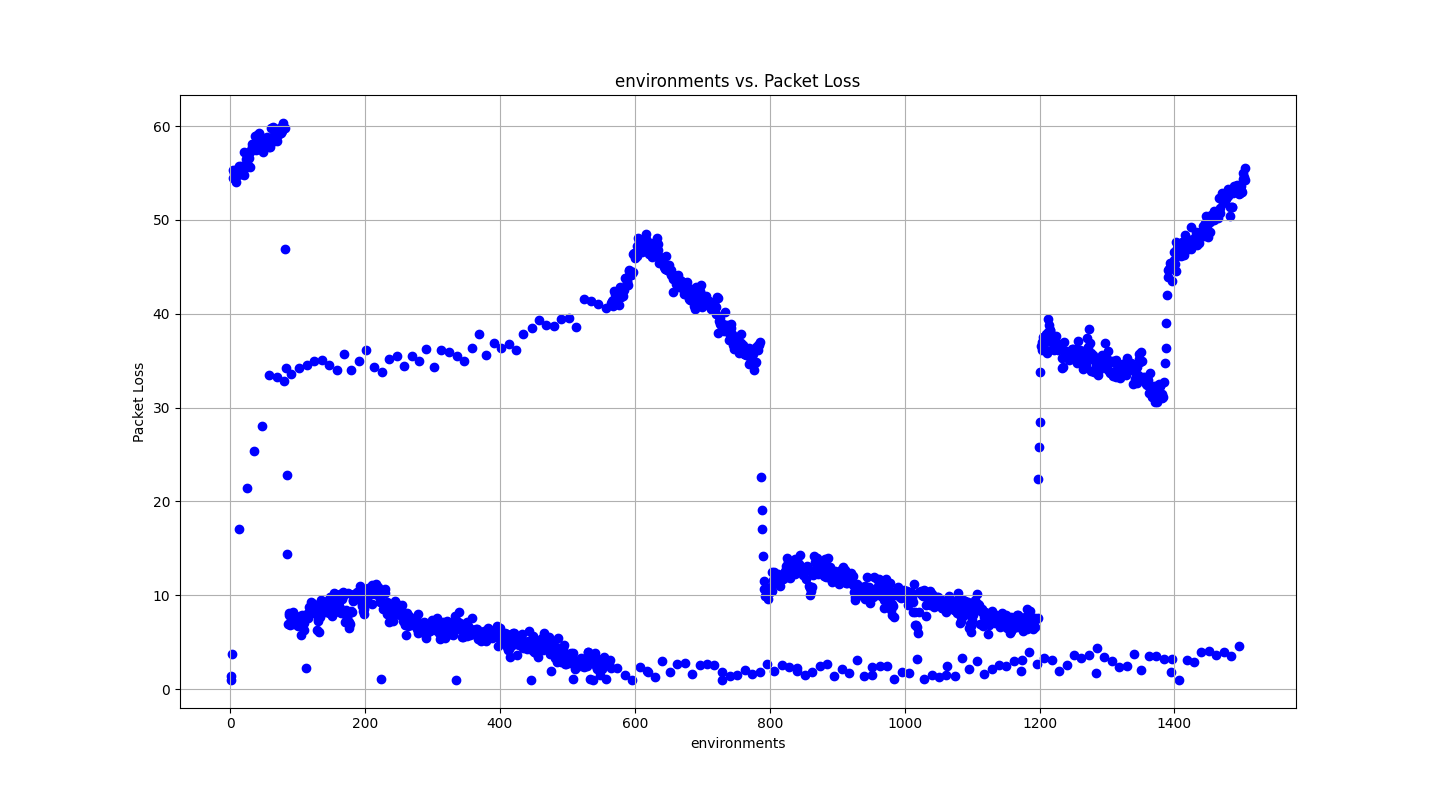

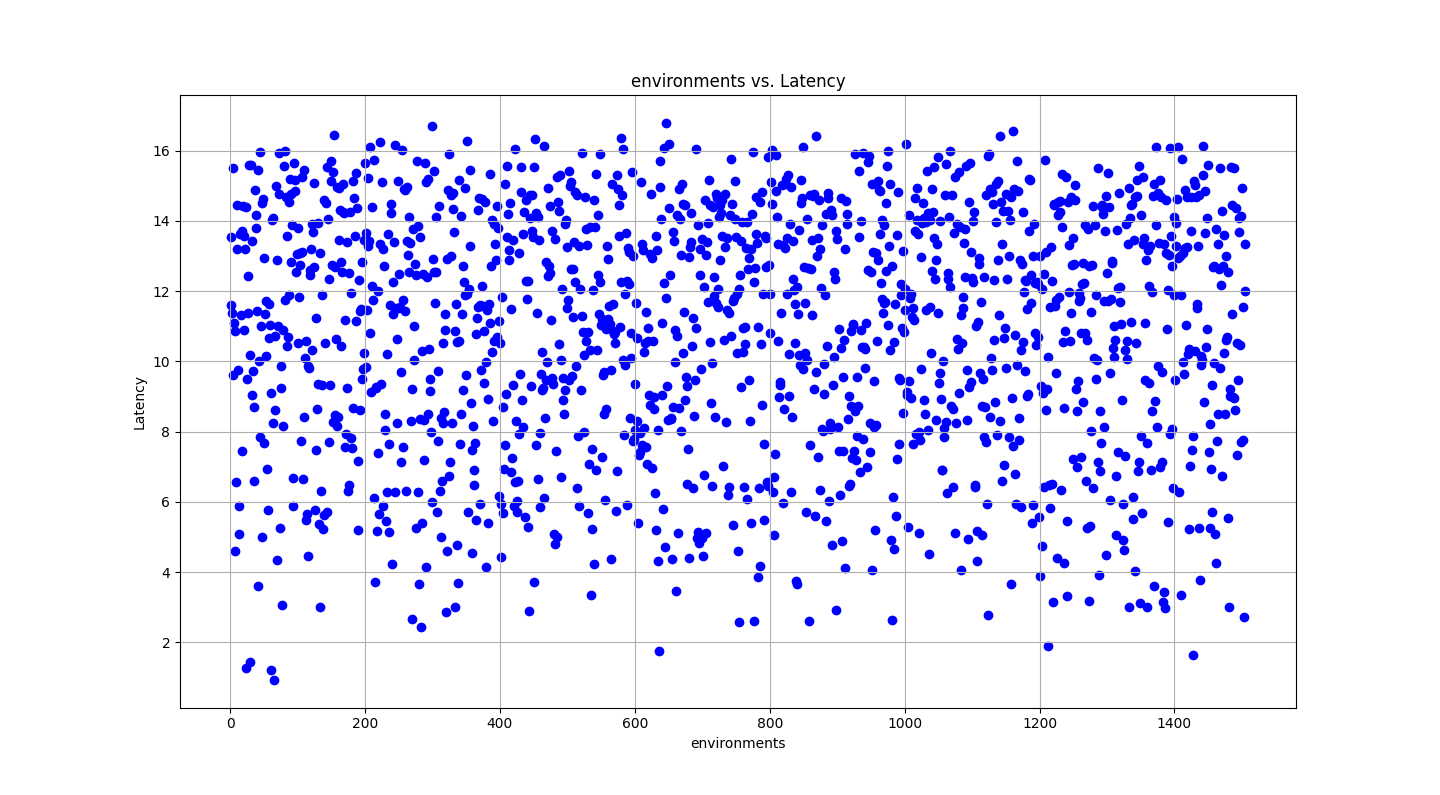

In [3]:
from IPython.display import Image, display

# Path to your image file
packet_path = '/content/packetloss.png'
latency_path = '/content/latency.png'

# Load and display the image
display(Image(filename=packet_path))
display(Image(filename=latency_path))



1. **Variability in Environments:**
   - **Problem:** The same configuration can yield different results in different environments due to varying conditions.
   - **Solution:** Introduce an approach similar to Hindsight Experience Replay (HER) to adapt to changing environments.

2. **Hindsight Experience Replay (HER):**
   - **Traditional HER:** In HER, after executing an action and observing the result, the agent also learns from what could have been achieved if it had aimed for a different goal.
   - **Your Adaptation:** Instead of focusing solely on the primary objective (e.g., minimizing packet loss), also consider other quality properties (e.g., energy consumption and latency).

3. **Reward Reshaping:**
   - **Problem:** Local optima can occur if the agent focuses too narrowly on a single objective.
   - **Solution:** During training, sample a batch of experiences and reshape the rewards to account for other quality properties. This could be done by:
     - **Introducing a multi-objective reward function:** Combine packet loss, energy consumption, and latency into a single reward metric. This can be a weighted sum or a more complex function that balances these properties.
     - **Periodic reward reshaping:** Occasionally modify the reward function to emphasize different aspects (e.g., focusing more on latency for some episodes).

4. **Implementation Steps:**
   - **Step 1:** Define the reward function to include packet loss, energy consumption, and latency. For example:

   $[R = w_1 \times \text{(Packet Loss)} + w_2 \times \text{(Energy Consumption)} + w_3 \times \text{(Latency)}]$

   where $(w_1, w_2, w_3)$ are weights that can be adjusted based on the importance of each property.
   
    
     
     
     
   - **Step 2:** During training, for each experience, calculate the reward using the defined function.
   - **Step 3:** Sample batches of experiences and periodically reshape a percentage of the rewards to account for different quality properties.
   - **Step 4:** Train the DRL agent using these reshaped rewards to learn a policy that generalizes better across different environments.

5. **Benefits:**
   - **Generalization:** By considering multiple quality properties, the agent can learn policies that perform well across varying environments.
   - **Avoiding Local Optima:** Reward reshaping helps the agent to avoid getting stuck in local optima by exploring diverse aspects of the environment.
   - **Balanced Performance:** The agent can achieve a balanced performance across packet loss, energy consumption, and latency.

6. **Potential Challenges:**
   - **Weight Selection:** Choosing appropriate weights for different quality properties can be challenging and may require tuning.
   - **Computational Complexity:** Reward reshaping and multi-objective optimization can increase the computational complexity of the training process.

